# Machine Learning in Python - Workshop 1 (KEY)

As with any other programming language, the best way to learn Python and its machine 
learning libraries is to play with them, so follow the steps below and ask for help from
a tutor if you get stuck.

Today's workshop is mostly about refamiliarizing everyone with some of the core libraries
we will be using for data management and visualization. If you don't remember how to do
something we would generally advise that you do the following: start by taking a look a the 
package documentation, then ask your classmates, and if you are still stuck then ask for 
help from a tutor.

---

## 1. Pandas

This course will assume that you have some basic familiarity with the **pandas** library, 
and now is a good time to go back and review the relevant materials from Python 
Programming and the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/).

For this workshop we will review a small part of **pandas** by working with a sample of 
data of Airbnb listings in Edinburgh. These data are included in the `listings.csv` 
file which should be available along with this notebook.

The data set includes the following variables:

* `id` - ID number of the listing
* `price` - Price, in GBP, for one night stay
* `neighbourhood` - Neighbourhood listing is located in
* `accommodates` - Number of people listing accommodates
* `bathrooms` - Number of bathrooms
* `bedrooms` - Number of bedrooms
* `beds` - Number of beds (which can be different than the number of bedrooms)
* `review_scores_rating` - Average rating of property
* `number_of_reviews` - Number of reviews
* `listing_url` - Listing URL


We will read in these data using pandas with the following code,

In [ ]:
import pandas as pd

d = pd.read_csv("listings.csv")
d

,id,price,neighbourhood,accommodates,bathrooms,bedrooms,beds,review_scores_rating,number_of_reviews,listing_url
0,15420,80.0,New Town,2,1.0,1.0,1.0,99.0,283,https://www.airbnb.com/rooms/15420
1,24288,115.0,Southside,4,1.5,2.0,2.0,92.0,199,https://www.airbnb.com/rooms/24288
2,38628,46.0,NaN,2,1.0,0.0,2.0,94.0,52,https://www.airbnb.com/rooms/38628
3,44552,32.0,Leith,2,1.0,1.0,1.0,93.0,184,https://www.airbnb.com/rooms/44552
4,47616,100.0,Southside,2,1.0,1.0,1.0,98.0,32,https://www.airbnb.com/rooms/47616
...,...,...,...,...,...,...,...,...,...,...
13240,36061175,95.0,New Town,3,1.0,1.0,2.0,NaN,0,https://www.airbnb.com/rooms/36061175
13241,36061191,NaN,Tollcross,3,1.0,1.0,2.0,NaN,0,https://www.airbnb.com/rooms/36061191
13242,36061722,NaN,Old Town,5,2.0,2.0,4.0,NaN,0,https://www.airbnb.com/rooms/36061722
13243,36061940,47.0,NaN,2,1.0,2.0,2.0,NaN,0,https://www.airbnb.com/rooms/36061940


Note here we print out the pandas dataframe object by returning it at the end of the cell, generally when we want to output something in a notebook it is better to use an explicit `print` function call but in this case we want to take advantage of Jupyter's ability to nicely display the pandas data frame output.

Below are a couple of quick exercises to re-familiarize yourself with pandas.

---

### &diams; Exercise 1

How many observations are included in this data set?

In [ ]:
len(d.index)

13245

In [ ]:
d.shape[0]

13245

---

### &diams; Exercise 2

How many different neighborhoods are represented in these data?

In [ ]:
d["neighbourhood"].nunique()

13

In [ ]:
d["neighbourhood"].unique()

array(['New Town', 'Southside', nan, 'Leith', 'Old Town', 'West End',
       'Haymarket', 'Morningside', 'Newington', 'Marchmont',
       'Cannonmills', 'Tollcross', 'Bruntsfield', 'Stockbridge'],
      dtype=object)

In [ ]:
d["neighbourhood"].describe()

count     10951
unique       13
top       Leith
freq       3134
Name: neighbourhood, dtype: object

---

### &diams; Exercise 3

What is the mean and the median price per night of an Airbnb in Edinburgh?

In [ ]:
print(
    "Mean :", d[["price"]].mean()[0], "\n" # We subset here to get a scalar
    "Med  :", d[["price"]].median()[0]
)

Mean : 97.2108692319485 
Med  : 75.0


In [ ]:
d["price"].describe()

count    13046.000000
mean        97.210869
std         86.031393
min          0.000000
25%         49.000000
50%         75.000000
75%        110.000000
max        999.000000
Name: price, dtype: float64

---

### &diams; Exercise 4

Calculate a new column called `beds_per_bedroom` which is the number of beds divided by the number bedrooms for a listing. For this new column report the 2.5th and 97.5th percentile.

In [ ]:
# If the following fails, make sure the correct version of pandas is loaded (e.g. not 1.0.5)
d = d.assign(
    beds_per_bedroom = d.beds / d.bedrooms
).replace(
    float("inf"), float("nan") # this handles cases where # bedrooms is 0.
)

d["beds_per_bedroom"]

0        1.0
1        1.0
2        NaN
3        1.0
4        1.0
        ... 
13240    2.0
13241    2.0
13242    2.0
13243    1.0
13244    1.0
Name: beds_per_bedroom, Length: 13245, dtype: float64

In [ ]:
d.beds_per_bedroom.quantile(q=(0.025,0.975))

0.025    1.0
0.975    2.5
Name: beds_per_bedroom, dtype: float64

---

## 2. Visualization

For this course we will be using a combination of the libraries **seaborn** and **matplotlib** for the purposes of visualization. The former is actually built using the latter, and is designed to specifically provide a high-level interface for creating statistical graphics.

We will set up some initial configuration details using **matplotlib** to determine the size and resolution of the plots that will be shown in the notebook.

In [ ]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80

and then we can use pandas and seaborn to visualize the Airbnb data.

### 2.1 Univariate plots

For example if we want to examine the distribution of the rental prices we can use pandas as follows,

<AxesSubplot:ylabel='Frequency'>

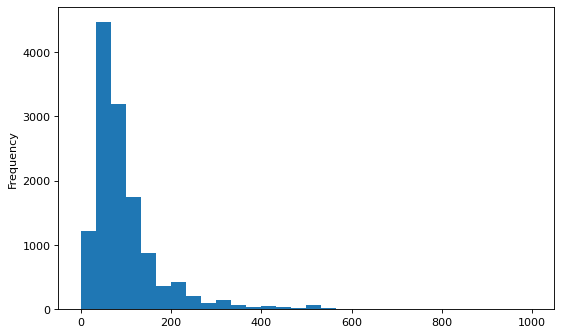

In [ ]:
d["price"].plot.hist(bins=30)

We can generate a similar plot using seaborn via the `histplot` function.

<AxesSubplot:xlabel='price', ylabel='Count'>

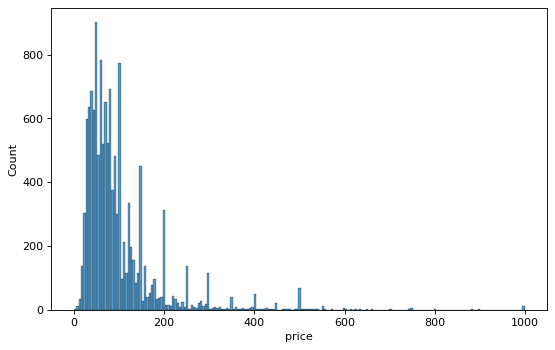

In [ ]:
sns.histplot(d["price"])

Like most plots within seaborn, `histplot` includes a large number of arguments which
we can use to adjust the plotting behavior. He we adjust the number of bins and add 
a kernel density estimate to our plot.

<AxesSubplot:xlabel='price', ylabel='Count'>

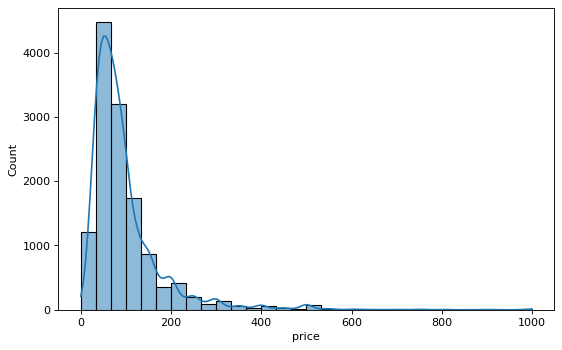

In [ ]:
sns.histplot(d["price"], kde=True, bins=30)

We can also examine the distribution of categorical variables by creating a bar plot. This is possible with pandas but somewhat clunky as we have to take care of transforming the variable into the underlying counts of the levels before creating the bar plot.

<AxesSubplot:>

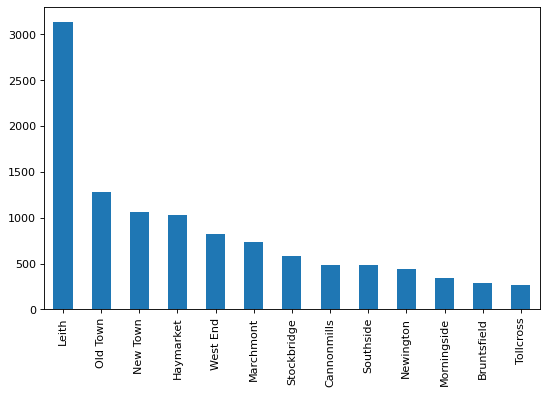

In [ ]:
d["neighbourhood"].value_counts().plot(kind="bar")

A similar plot can be created with seaborn using the `catplot` or `countplot` functions,

<AxesSubplot:xlabel='neighbourhood', ylabel='count'>

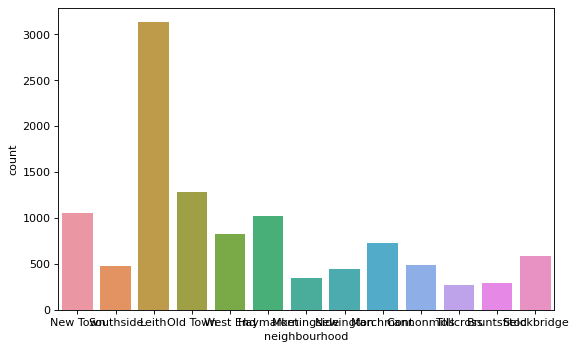

In [ ]:
sns.countplot(x="neighbourhood", data=d)

Note that the x-axis labels are overploting making it nearly impossible to read them, one quick fix is to rotate the plot by putting the catergories on the y-axis which can be done as follows,

<AxesSubplot:xlabel='count', ylabel='neighbourhood'>

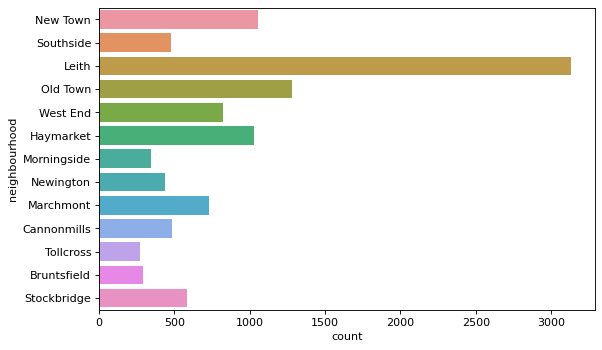

In [ ]:
sns.countplot(y="neighbourhood", data=d)

---

### &diams; Exercise 5

Create a plot and describe the distribution of the `review_scores_rating` variable.

<AxesSubplot:xlabel='review_scores_rating', ylabel='Count'>

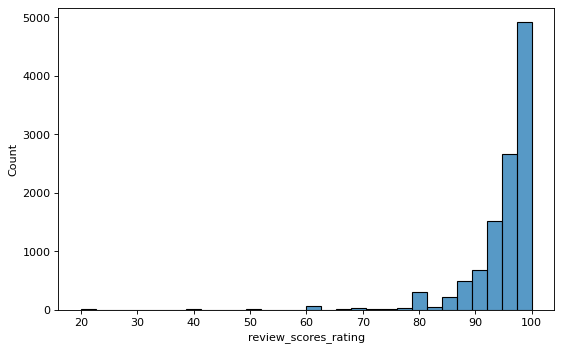

In [ ]:
sns.histplot(d["review_scores_rating"].dropna(), bins=30)

The reviews are a left skewed unimodal distribution with a mode near 100.

---

## Multivariate plots

Seaborn also includes a number of functions for visualizing bivariate and multivariate relationships within a data set. The two primary high level functions are `relplot` and `catplot` for plotting numeric or categorical variable relationships respectively.

For example to create a scatter plot of `price` vs `review_scores_rating` we can use `relplot` as follows,

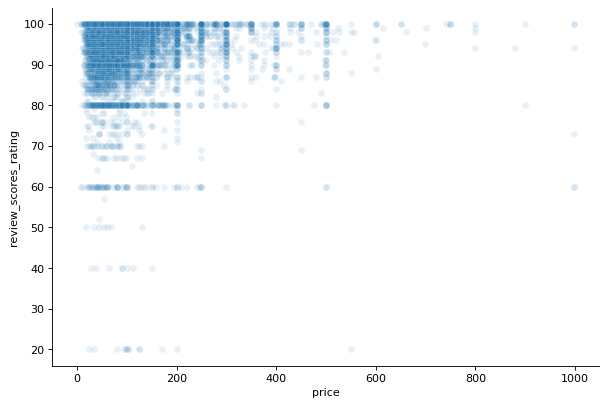

In [ ]:
sns.relplot(
    x = "price",
    y = "review_scores_rating",
    data = d,
    aspect = 1.5,
    alpha = 0.1
)

We use the `aspect` argument to adjust the aspect ratio of the plot, making it 1.5 times as wide as it is tall and the `alpha` argument to reduce issues with the over-plotting of points.

Note that `relplot` can also be used with categorical data, the function only determines the type of plot that will be created (i.e. a scatter or line plot).

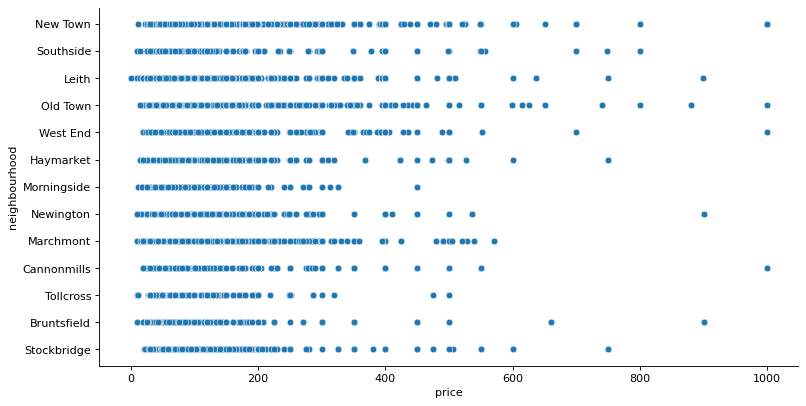

In [ ]:
sns.relplot(
    x = "price",
    y = "neighbourhood",
    data = d,
    aspect = 2
)

`catplot` alternatively deals with plots that involve at least one categorical variable (e.g. boxplots, swarm plots, bar plots, etc.). The type of plot is determined by the `kind` argument that is passed to the function. You can try changing this in the cell below and see how it affects the plot. Try values like: `"violin"`, `"bar"`, `"strip"`, or `"point"`.

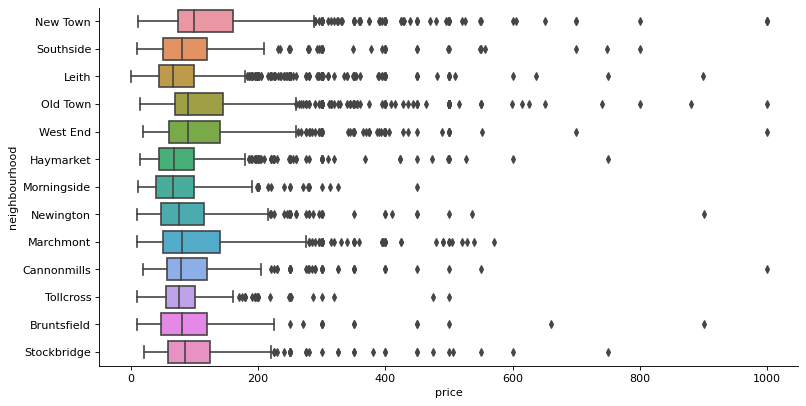

In [ ]:
sns.catplot(
    x = "price",
    y = "neighbourhood",
    kind = "box",
    data = d,
    aspect = 2
)

Just like `relplot` there is not a requirement that both `x` and `y` arguments be categorical variables, but note that when using two numeric variables the `x` variable will be treated as the categorical variable for plotting purposes. 

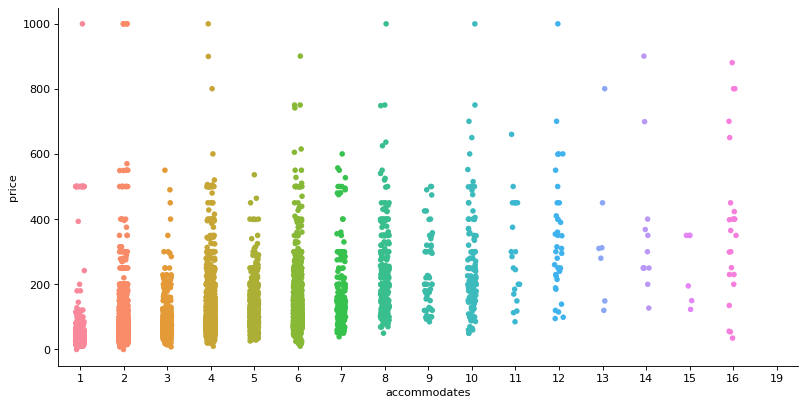

In [ ]:
sns.catplot(
    y = "price",
    x = "accommodates",
    data = d,
    aspect = 2
)

---

### &diams; Exercise 6

What happens if you rerun the cell above with the `x` and `y` arguments swapped? To make this behavior even more clear try changing the `kind` to `"box"` for both plots.

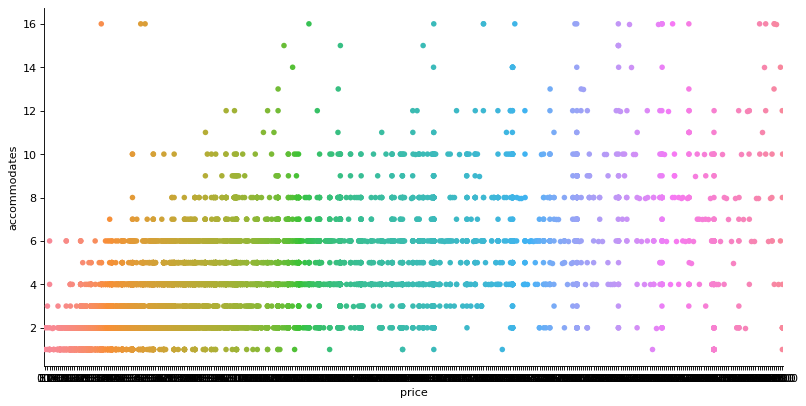

In [ ]:
sns.catplot(
    x = "price",
    y = "accommodates",
    data = d,
    aspect = 2
)

All of the x values are treated as different categories, and are given their own ticks making the x-axis unreadable.

---

Finally, one other useful tool provided by seaborn is its ability to generate a pairs plot for examining the relationship between many numeric variables at the same time. Here we subset the original data to only include neighbourhoods in the city center and then create a pairs plot for the numeric variables. 

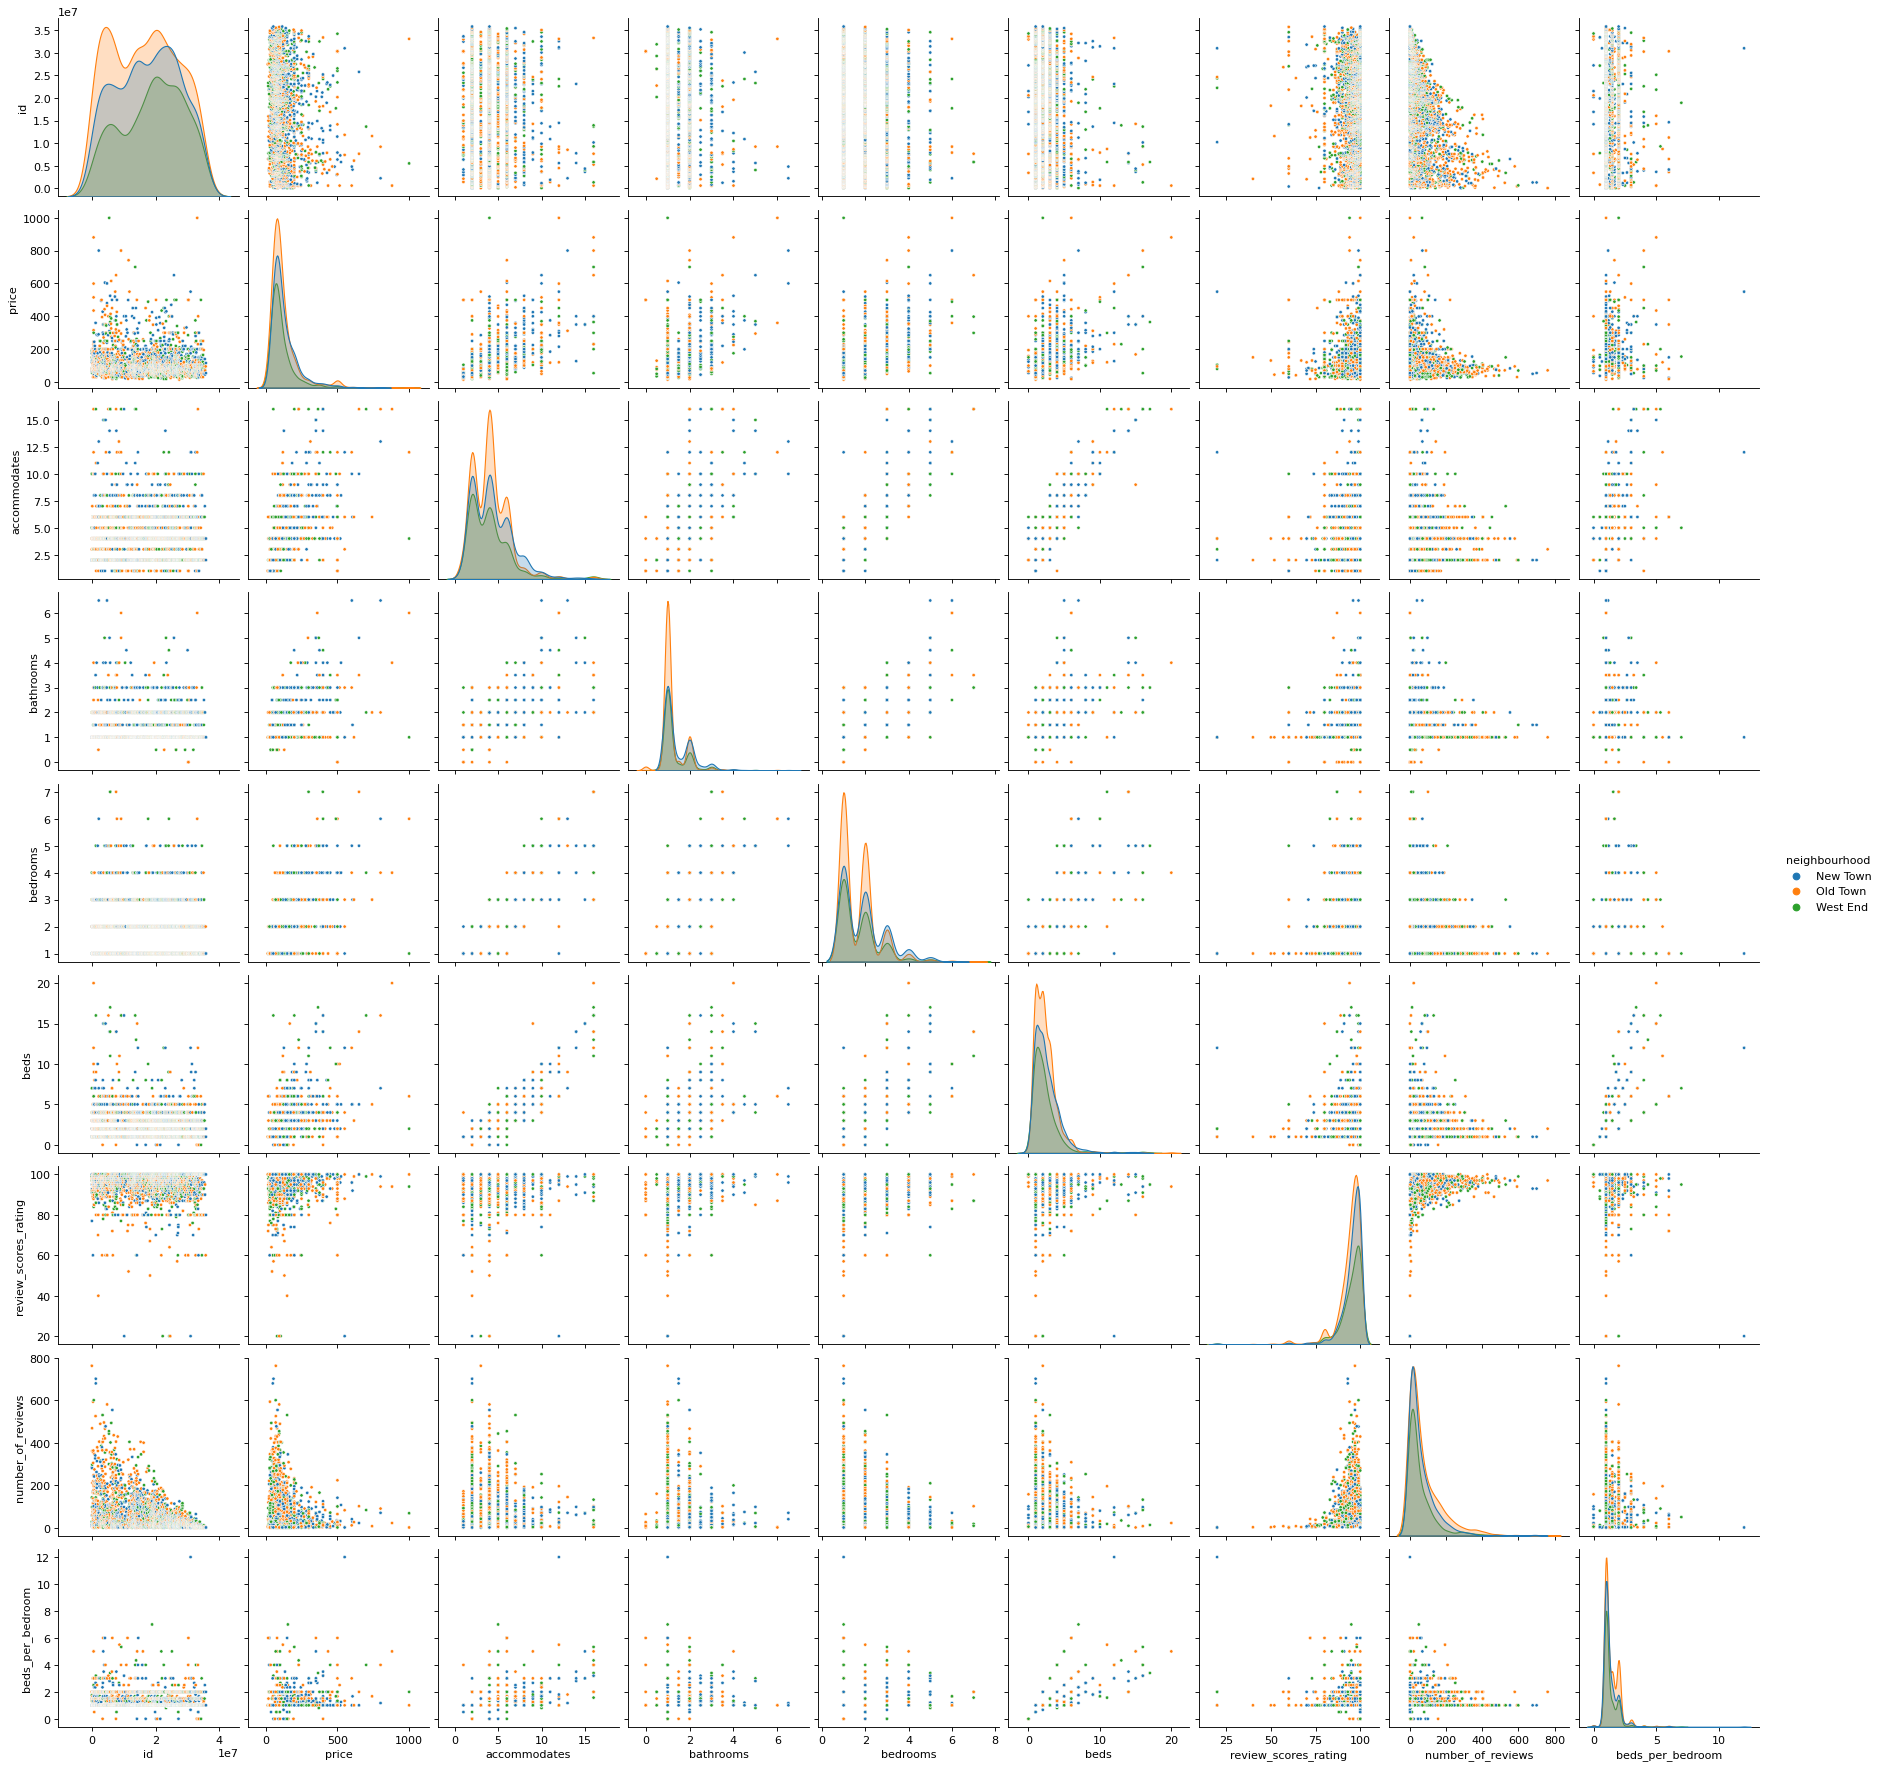

In [ ]:
center = d.query('neighbourhood in ["New Town", "Old Town", "West End"]')

sns.pairplot(center.dropna(), hue="neighbourhood", markers=".")

*Hint* - if you get an error when running the above code make sure that you have not accidently introduced `Inf` values when you constructed the `beds_per_bedroom` column in **Exercise 4**.

---

### &diams; Exercise 7

Pick several other neighbourhoods that are of interest to you and create a pairs plot for them. Is there anything interesting revealed by your plot?

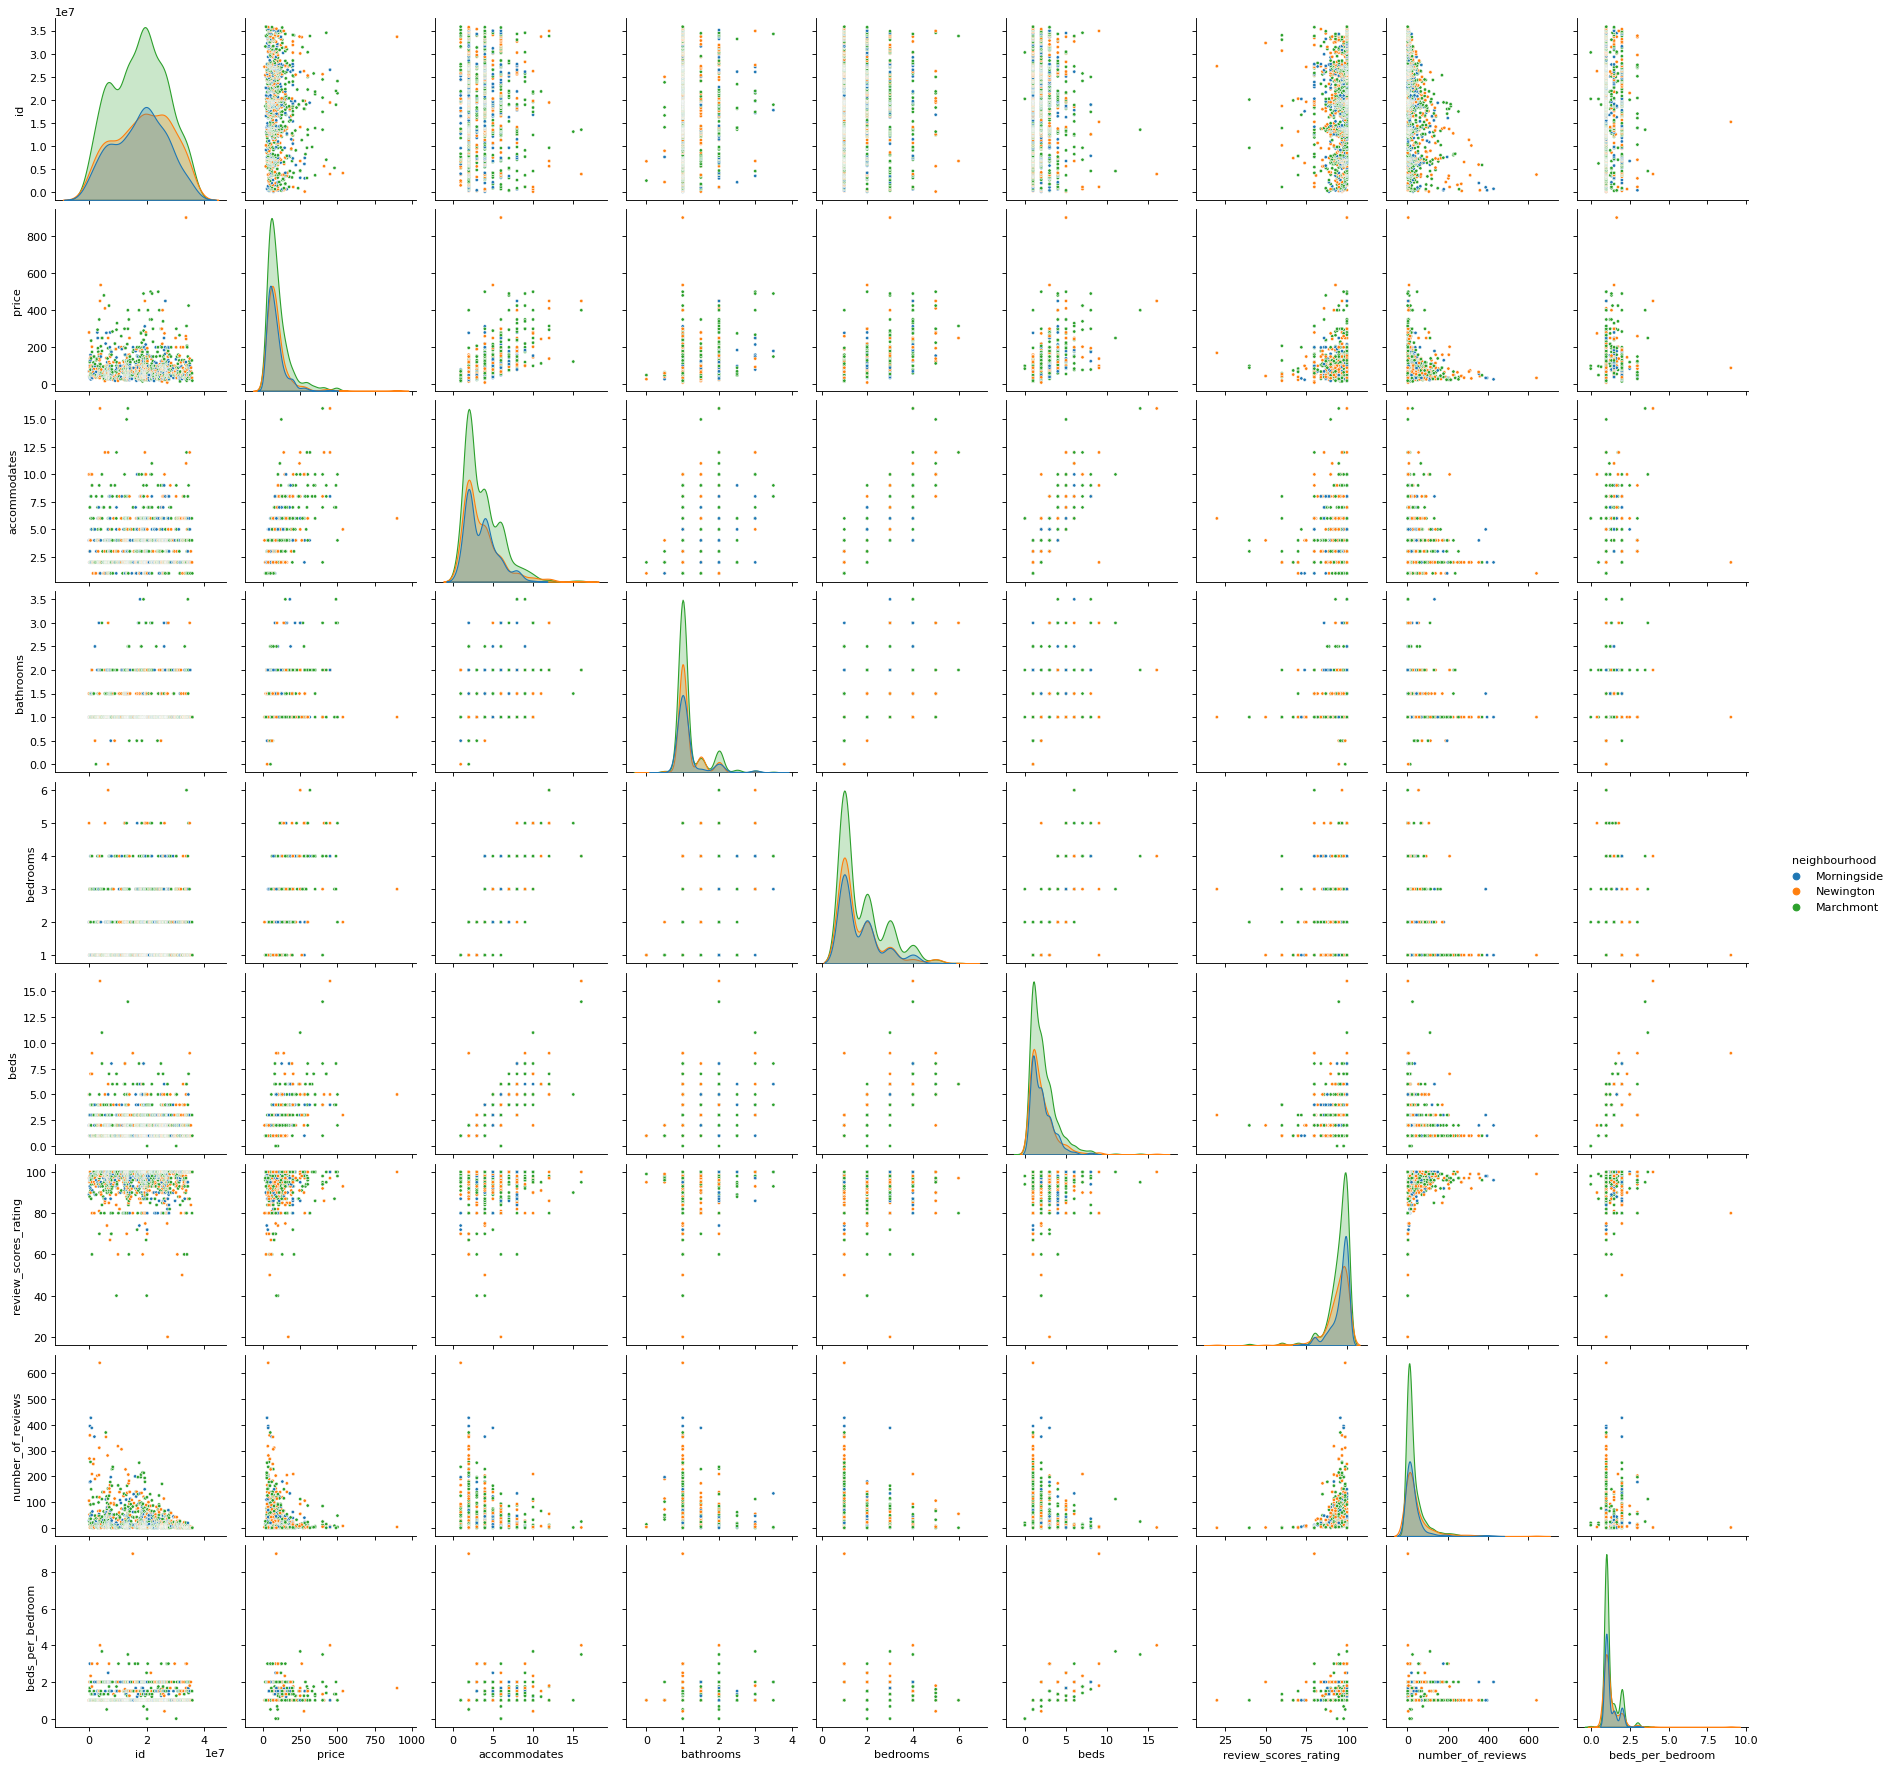

In [ ]:
student = d.query('neighbourhood in ["Marchmont", "Morningside", "Newington"]')
sns.pairplot(student.dropna(), hue="neighbourhood", markers=".")

There are not any obvious patterns, there does not seem to be much difference betweent the three neighborhoods.

---

Additional information, documentation, and examples can be found at the [seaborn website](https://seaborn.pydata.org/). The tutorial and gallery sections are of particular use for new users. 

---

## 3. Competing the worksheet

At this point you have hopefully been able to complete all the preceeding exercises. Now 
is a good time to check the reproducibility of this document by restarting the notebook's
kernel and rerunning all cells in order.

Once that is done and you are happy with everything, you can then run the following cell 
to generate your PDF.

In [ ]:
!jupyter nbconvert --to pdf mlp-week01.ipynb 

[NbConvertApp] Converting notebook mlp-week01.ipynb to pdf
[NbConvertApp] Support files will be in mlp-week01_files/
[NbConvertApp] Making directory ./mlp-week01_files
[NbConvertApp] Making directory ./mlp-week01_files
[NbConvertApp] Making directory ./mlp-week01_files
[NbConvertApp] Making directory ./mlp-week01_files
[NbConvertApp] Making directory ./mlp-week01_files
[NbConvertApp] Making directory ./mlp-week01_files
[NbConvertApp] Making directory ./mlp-week01_files
[NbConvertApp] Making directory ./mlp-week01_files
[NbConvertApp] Making directory ./mlp-week01_files
[NbConvertApp] Making directory ./mlp-week01_files
[NbConvertApp] Making directory ./mlp-week01_files
[NbConvertApp] Making directory ./mlp-week01_files
[NbConvertApp] Making directory ./mlp-week01_files
[NbConvertApp] Writing 55066 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[N

Once generated this PDF can be submitted to Gradescope under the `mlp-week01` assignmnet. 
This must be done by January 20th at 5 pm in order to receive credit for this workshop. See the 
getting started with Gradescope screencast for the necessary steps for both individual and team
submissions.